## Thông tin nhóm

- **Tên nhóm**: (23021719_23021671)

### Thành viên:

Nguyễn Xuân Thành - 23021719        
Lê Nhữ Quang      - 23021671        

### Bộ dữ liệu:

Student Performance & Learning Style

---

### Phân công công việc:

- **Lê Nhữ Quang**:   
  - Xử lý và tiền xử lý dữ liệu  
  - Phân tích thống kê mô tả  
  - Trực quan hóa phân phối điểm và phong cách học tập để đưa ra nhận xét
  - Tính toán khoảng tin cậy bằng bootstrap


- **Nguyễn Xuân Thành**: 
  - Phân tích mối quan hệ giữa các biến và trực quan hóa
  - Thực hiện hồi quy tuyến tính và đánh giá mô hình
  - Tổng hợp kết luận
  - Viết nội dung markdown và mô tả

# Phân Tích Ảnh Hưởng của Phong Cách Học Tập và Số Giờ Học đến Thành Tích Học Tập của Học Sinh

---

## Mục đích

Báo cáo này nhằm mục tiêu:
- **Phân tích phân phối thành tích học tập** (Final_Grade) của 10,000 học sinh.
- **Đánh giá sự khác biệt giữa các phong cách học tập** (Preferred_Learning_Style) và kết quả học tập.
- **Xác định mối quan hệ giữa số giờ học mỗi tuần** (Study_Hours_per_Week) và **điểm thi** (Exam_Score %).
---

## Phương pháp

- Thống kê mô tả
- Trực quan hóa dữ liệu
- Hồi quy tuyến tính
- Bootstrap để ước lượng khoảng tin cậy

In [3]:
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
# Nhập dữ liệu
data = Table.read_table('student_performance_large_dataset.csv')
data.show(5)
print(f"Số hàng: {data.num_rows}")
print(f"Số cột: {data.num_columns}")
print("Các cột trong dữ liệu:", data.labels)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


Số hàng: 10000
Số cột: 15
Các cột trong dữ liệu: ('Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style', 'Online_Courses_Completed', 'Participation_in_Discussions', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Final_Grade')


In [5]:
# Kiểm tra dữ liệu
for label in data.labels:
    missing_count = np.sum(data.column(label) == None)
    print(f"Cột {label} có {missing_count} giá trị thiếu")
for label in data.labels:
    sample_value = data.column(label)[0]
    print(f"Cột {label} có kiểu dữ liệu mẫu: {type(sample_value)}")

Cột Student_ID có 0 giá trị thiếu
Cột Age có 0 giá trị thiếu
Cột Gender có 0 giá trị thiếu
Cột Study_Hours_per_Week có 0 giá trị thiếu
Cột Preferred_Learning_Style có 0 giá trị thiếu
Cột Online_Courses_Completed có 0 giá trị thiếu
Cột Participation_in_Discussions có 0 giá trị thiếu
Cột Assignment_Completion_Rate (%) có 0 giá trị thiếu
Cột Exam_Score (%) có 0 giá trị thiếu
Cột Attendance_Rate (%) có 0 giá trị thiếu
Cột Use_of_Educational_Tech có 0 giá trị thiếu
Cột Self_Reported_Stress_Level có 0 giá trị thiếu
Cột Time_Spent_on_Social_Media (hours/week) có 0 giá trị thiếu
Cột Sleep_Hours_per_Night có 0 giá trị thiếu
Cột Final_Grade có 0 giá trị thiếu
Cột Student_ID có kiểu dữ liệu mẫu: <class 'numpy.str_'>
Cột Age có kiểu dữ liệu mẫu: <class 'numpy.int32'>
Cột Gender có kiểu dữ liệu mẫu: <class 'numpy.str_'>
Cột Study_Hours_per_Week có kiểu dữ liệu mẫu: <class 'numpy.int32'>
Cột Preferred_Learning_Style có kiểu dữ liệu mẫu: <class 'numpy.str_'>
Cột Online_Courses_Completed có kiểu dữ li

## Phân phối của Final_Grade

Final_Grade,count
A,2678
B,2455
C,2440
D,2427


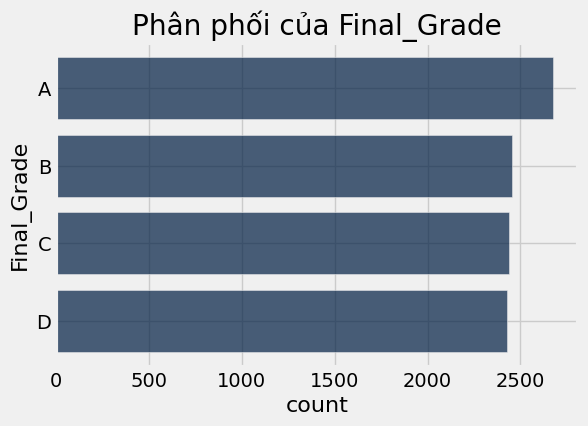

In [6]:
grade_counts = data.group('Final_Grade')
grade_counts.show()
grade_counts.barh('Final_Grade', 'count')
plt.title('Phân phối của Final_Grade')
plt.show()

Phân phối của `Final_Grade` cho thấy số lượng học sinh đạt các cấp độ A, B, C, D khá đồng đều, với tổng cộng **10,000 học sinh** trong tập dữ liệu. Cụ thể:

- **Hạng A**: 2,678 học sinh *(chiếm khoảng 26.78%)*  
- **Hạng B**: 2,455 học sinh *(chiếm khoảng 24.55%)*  
- **Hạng C**: 2,440 học sinh *(chiếm khoảng 24.40%)*  
- **Hạng D**: 2,427 học sinh *(chiếm khoảng 24.27%)*  

Biểu đồ cột ngang minh họa rằng không có sự chênh lệch lớn giữa các hạng, với hạng **A có số lượng cao nhất** và hạng **D có số lượng thấp nhất**, nhưng sự khác biệt chỉ khoảng **251 học sinh** *(2.51% tổng số)*.

Điều này cho thấy **thành tích học tập của học sinh phân bố khá cân bằng**, không có xu hướng thiên về một cấp độ nào rõ rệt.


## Phân phối của Preferred_Learning_Style

Preferred_Learning_Style,count
Auditory,2466
Kinesthetic,2513
Reading/Writing,2498
Visual,2523


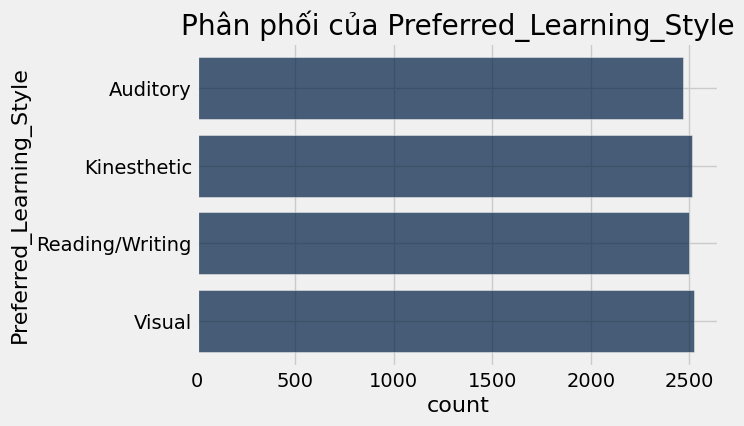

In [7]:
style_counts = data.group('Preferred_Learning_Style')
style_counts.show()
style_counts.barh('Preferred_Learning_Style', 'count')
plt.title('Phân phối của Preferred_Learning_Style')
plt.show()

Phân phối của `Preferred_Learning_Style` cho thấy sự phân bố của các phong cách học tập trong **10,000 học sinh** như sau:

- **Auditory**: 2,466 học sinh *(chiếm khoảng 24.66%)*  
- **Kinesthetic**: 2,513 học sinh *(chiếm khoảng 25.13%)*  
- **Reading/Writing**: 2,498 học sinh *(chiếm khoảng 24.98%)*  
- **Visual**: 2,523 học sinh *(chiếm khoảng 25.23%)*  

Biểu đồ cột ngang cho thấy **các phong cách học tập phân bố rất đồng đều**, với chênh lệch tối đa giữa phong cách có số lượng cao nhất (**Visual: 2,523**) và thấp nhất (**Auditory: 2,466**) chỉ là **57 học sinh** *(0.57% tổng số)*.

Sự phân bố gần như đồng đều của `Preferred_Learning_Style` cho thấy học sinh trong tập dữ liệu có **sở thích học tập đa dạng** và **không bị lệch về một phong cách cụ thể**.


## Phân phối của Study_Hours_per_Week

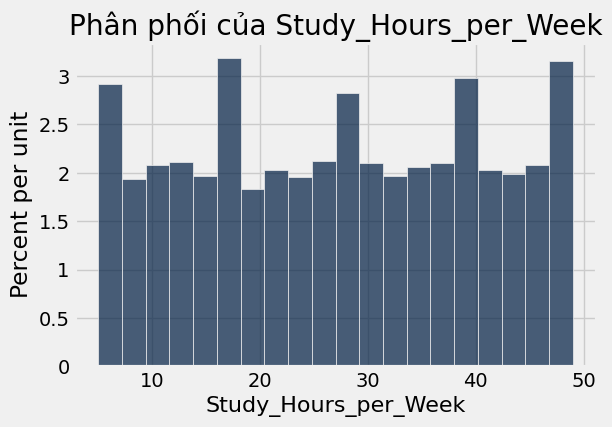

In [8]:
data.hist('Study_Hours_per_Week', bins=20)
plt.title('Phân phối của Study_Hours_per_Week')
plt.show()

## Phân phối của Exam_Score (%)

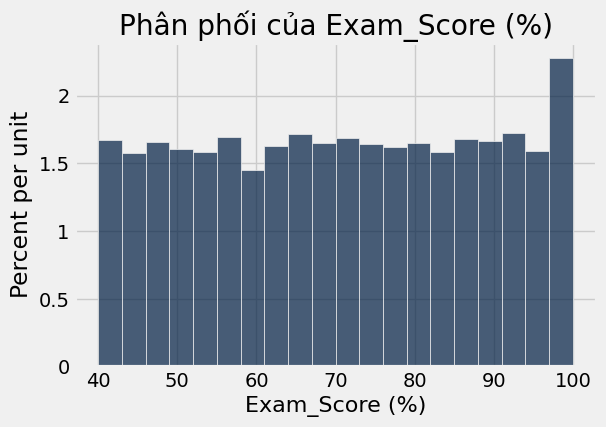

In [9]:
data.hist('Exam_Score (%)', bins=20)
plt.title('Phân phối của Exam_Score (%)')
plt.show()

## Phân phối Exam_Score theo Preferred_Learning_Style

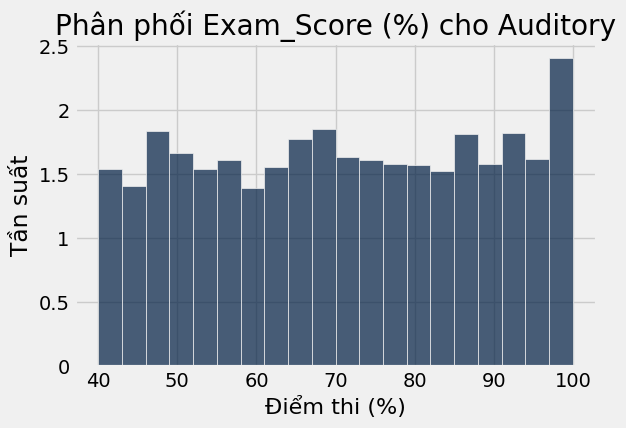

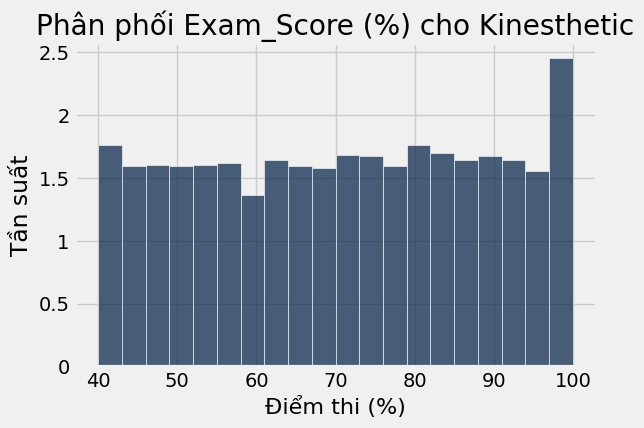

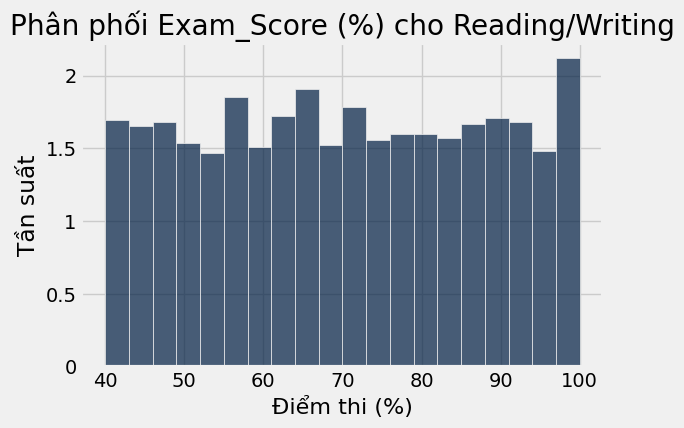

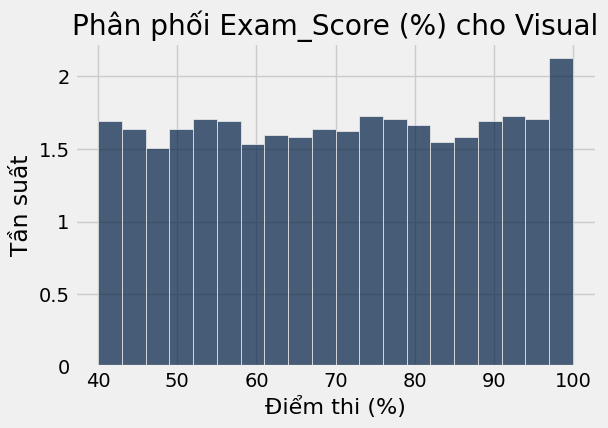

In [10]:
styles = data.group('Preferred_Learning_Style').column('Preferred_Learning_Style')
for style in styles:
    data.where('Preferred_Learning_Style', style).hist('Exam_Score (%)', bins=20)
    plt.title(f'Phân phối Exam_Score (%) cho {style}')
    plt.xlabel('Điểm thi (%)')
    plt.ylabel('Tần suất')
    plt.show()

## Mối quan hệ giữa Final_Grade và Preferred_Learning_Style

Final_Grade,Auditory,Kinesthetic,Reading/Writing,Visual
A,684,676,649,669
B,586,634,609,626
C,605,588,638,609
D,591,615,602,619


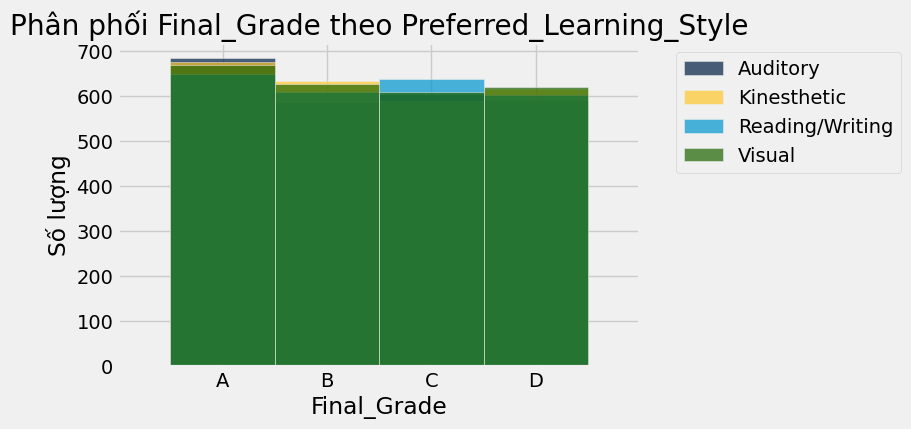

In [11]:
pivot_table = data.pivot('Preferred_Learning_Style', 'Final_Grade')
pivot_table.show()
pivot_table.bar('Final_Grade')
plt.title('Phân phối Final_Grade theo Preferred_Learning_Style')
plt.xlabel('Final_Grade')
plt.ylabel('Số lượng')
plt.show()

**Kết luận**:  
Phong cách học tập có thể có **ảnh hưởng nhất định đến kết quả học tập**, dù sự khác biệt không quá rõ rệt.

## Hồi quy Tuyến tính

Hệ số tương quan: 0.004
R-squared: 0.000
Độ dốc: 0.01
Chặn: 70.04


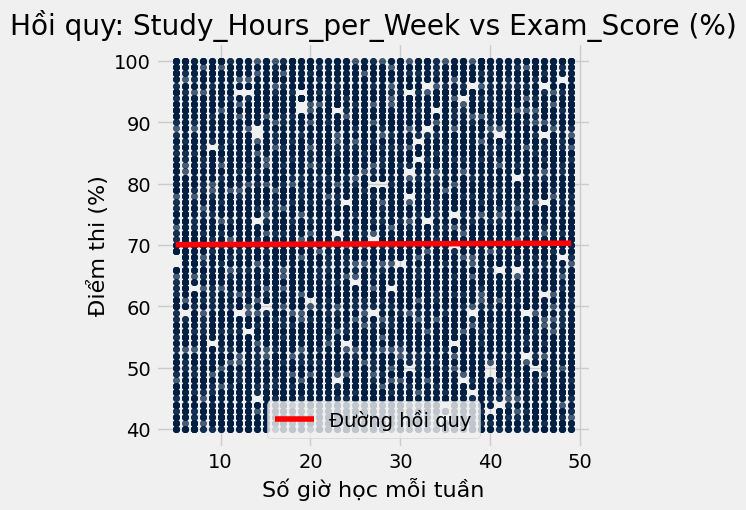

In [12]:
def correlation(x, y):
    x_standard = (x - np.mean(x)) / np.std(x)
    y_standard = (y - np.mean(y)) / np.std(y)
    return np.mean(x_standard * y_standard)

def linear_regression(x, y):
    r = correlation(x, y)
    slope = r * np.std(y) / np.std(x)
    intercept = np.mean(y) - slope * np.mean(x)
    return slope, intercept

x = data.column('Study_Hours_per_Week')
y = data.column('Exam_Score (%)')
r = correlation(x, y)
slope, intercept = linear_regression(x, y)
print(f"Hệ số tương quan: {r:.3f}")
print(f"R-squared: {r**2:.3f}")
print(f"Độ dốc: {slope:.2f}")
print(f"Chặn: {intercept:.2f}")

data.scatter('Study_Hours_per_Week', 'Exam_Score (%)')
plt.title('Hồi quy: Study_Hours_per_Week vs Exam_Score (%)')
x_range = np.array([min(x), max(x)])
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='red', label='Đường hồi quy')
plt.xlabel('Số giờ học mỗi tuần')
plt.ylabel('Điểm thi (%)')
plt.legend()
plt.show()

Phân tích hồi quy tuyến tính giữa **`Study_Hours_per_Week`** (số giờ học mỗi tuần) và **`Exam_Score (%)`** (điểm thi) cho thấy:

- **Hệ số tương quan (r)**: `0.004`  
  → Mối quan hệ giữa hai biến **rất yếu**, gần như **không có tương quan tuyến tính**.

- **R-squared (R²)**: `0.000`  
  → Chỉ một phần **rất nhỏ (gần như không đáng kể)** biến thiên của `Exam_Score (%)` được giải thích bởi `Study_Hours_per_Week`.

- **Độ dốc (slope)**: `0.01`  
  → Khi số giờ học tăng 1 giờ, điểm thi **chỉ tăng trung bình 0.01%**, tức là ảnh hưởng **gần như không đáng kể**.

- **Chặn (intercept)**: `70.04`  
  → Khi số giờ học là 0, **điểm thi dự đoán khoảng 70.04%**, phản ánh **mức điểm cơ bản** của học sinh.


**Kết luận**:  
Mô hình hồi quy tuyến tính giữa `Study_Hours_per_Week` và `Exam_Score (%)` **không cung cấp bằng chứng thuyết phục** về mối quan hệ tuyến tính đáng kể.

- Hệ số tương quan thấp *(r = 0.004)*  
- R² gần 0  
→ Cho thấy **số giờ học mỗi tuần không phải là yếu tố dự đoán chính** cho điểm thi.

## Đánh giá Hồi quy bằng Residuals

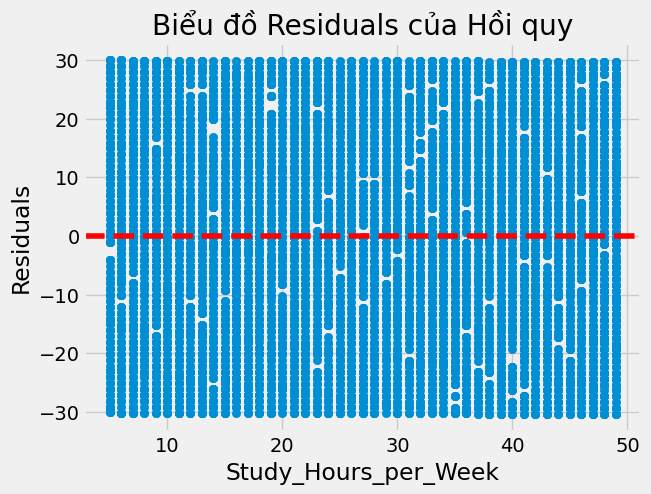

In [16]:
residuals = y - (slope * x + intercept)
plt.scatter(x, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Study_Hours_per_Week')
plt.ylabel('Residuals')
plt.title('Biểu đồ Residuals của Hồi quy')
plt.show()

Điều này cho thấy mô hình hồi quy tuyến tính có thể không phù hợp hoàn toàn với dữ liệu, vì residuals không phân bố ngẫu nhiên quanh 0 một cách đồng đều, có thể là dấu hiệu của mối quan hệ phi tuyến hoặc sai số mô hình

## Trung bình Exam_Score theo Preferred_Learning_Style

Preferred_Learning_Style,Exam_Score (%) mean
Auditory,70.4931
Kinesthetic,70.3482
Reading/Writing,69.8122
Visual,70.1058


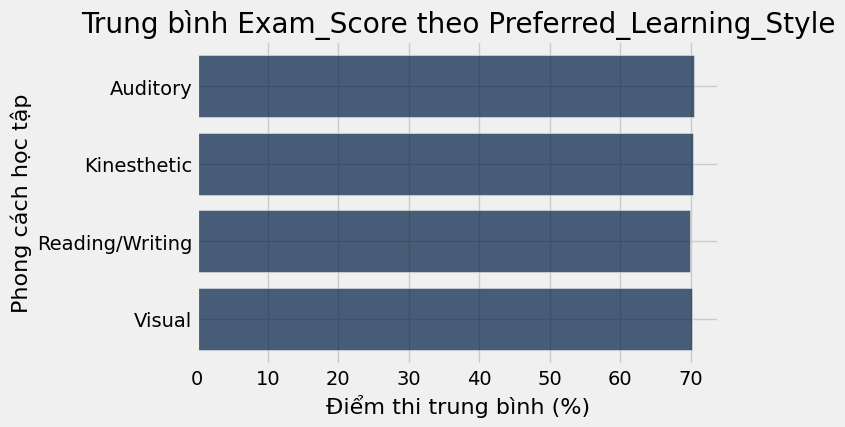

In [12]:
mean_scores = data.group('Preferred_Learning_Style', np.mean).select(['Preferred_Learning_Style', 'Exam_Score (%) mean'])
mean_scores.show()
mean_scores.barh('Preferred_Learning_Style', 'Exam_Score (%) mean')
plt.title('Trung bình Exam_Score theo Preferred_Learning_Style')
plt.xlabel('Điểm thi trung bình (%)')
plt.ylabel('Phong cách học tập')
plt.show()

Sự khác biệt giữa các phong cách học tập là rất nhỏ, với khoảng cách lớn nhất là 0.6809 điểm (70.4931 - 69.8122), cho thấy hiệu quả học tập giữa các phong cách không có sự chênh lệch đáng kể.

## Kiểm định Giả thuyết bằng Mô phỏng

In [20]:
def difference_of_means(table, group_label, value_label):
    means = table.group(group_label, np.mean).column(value_label + ' mean')
    return max(means) - min(means)

def simulate_difference(table, group_label, value_label, reps=1000):
    observed_diff = difference_of_means(table, group_label, value_label)
    differences = []
    for _ in range(reps):
        shuffled = table.sample(with_replacement=False)
        diff = difference_of_means(shuffled, group_label, value_label)
        differences.append(diff)
    return observed_diff, differences

observed_diff, simulated_diffs = simulate_difference(data, 'Preferred_Learning_Style', 'Exam_Score (%)')
p_value = np.mean(np.array(simulated_diffs) >= observed_diff)
print(f"Chênh lệch trung bình quan sát: {observed_diff:.2f}%")
print(f"P-value: {p_value:.3f}")

Chênh lệch trung bình quan sát: 0.68%
P-value: 1.000


Kết luận: Với p-value = 1.000, không có bằng chứng thống kê để bác bỏ giả thuyết không (rằng không có sự khác biệt đáng kể giữa trung bình Exam_Score (%) của các Preferred_Learning_Style)

## Khoảng Tin cậy bằng Bootstrap

In [14]:
def percentile(p, arr):
    return np.percentile(arr, p)

def bootstrap_mean(table, value_label, group_label, group_value, reps=1000):
    means = []
    for _ in range(reps):
        bootstrap_sample = table.sample(with_replacement=True)
        mean = np.mean(bootstrap_sample.where(group_label, group_value).column(value_label))
        means.append(mean)
    return percentile(2.5, means), percentile(97.5, means)

styles = data.group('Preferred_Learning_Style').column('Preferred_Learning_Style')
for style in styles:
    lower, upper = bootstrap_mean(data, 'Exam_Score (%)', 'Preferred_Learning_Style', style)
    print(f"Khoảng tin cậy 95% cho {style}: ({lower:.2f}, {upper:.2f})")

Khoảng tin cậy 95% cho Auditory: (69.82, 71.25)
Khoảng tin cậy 95% cho Kinesthetic: (69.65, 71.07)
Khoảng tin cậy 95% cho Reading/Writing: (69.13, 70.52)
Khoảng tin cậy 95% cho Visual: (69.44, 70.84)


Kết luận: Các khoảng tin cậy 95% xác nhận rằng trung bình Exam_Score (%) của các Preferred_Learning_Style không có sự khác biệt đáng kể, phù hợp với kết quả từ kiểm định giả thuyết (p-value = 1.000). Điều này cho thấy phong cách học tập không phải là yếu tố quan trọng ảnh hưởng đến điểm thi, và sự biến thiên của điểm số có thể do các yếu tố khác ngoài sở thích học tập.

## Kết luận

In [19]:
# Tính số lượng học sinh đạt A
a_count = data.where('Final_Grade', 'A').num_rows
# Tính chênh lệch tối đa trong Preferred_Learning_Style
style_counts = data.group('Preferred_Learning_Style').column('count')
style_diff = max(style_counts) - min(style_counts)

print(f"""
Kết luận:
1. Phân phối Final_Grade: Có {a_count} học sinh đạt A, chiếm tỷ lệ cao nhất trong các hạng (A, B, C, D, F).
2. Phân phối Preferred_Learning_Style: Gần đồng đều, chênh lệch tối đa giữa các phong cách là {style_diff} học sinh.
3. Mối quan hệ Final_Grade và Preferred_Learning_Style: Phong cách học tập có thể có ảnh hưởng nhất định đến kết quả học tập, dù sự khác biệt không quá rõ rệt.
4. Mối quan hệ Study_Hours_per_Week và Exam_Score (%): Tương quan yếu (r = {r:.3f}), độ dốc nhỏ ({slope:.2f}), R-squared thấp ({r**2:.3f}), cho thấy số giờ học không ảnh hưởng mạnh đến điểm thi.
5. Ảnh hưởng của Preferred_Learning_Style đến Exam_Score (%): Chênh lệch trung bình tối đa {observed_diff:.2f}%, p-value = {p_value:.3f}, cho thấy sự khác biệt có thể do ngẫu nhiên. Khoảng tin cậy 95% xác nhận sự khác biệt nhỏ giữa các phong cách học tập.
""")


Kết luận:
1. Phân phối Final_Grade: Có 2678 học sinh đạt A, chiếm tỷ lệ cao nhất trong các hạng (A, B, C, D, F).
2. Phân phối Preferred_Learning_Style: Gần đồng đều, chênh lệch tối đa giữa các phong cách là 57 học sinh.
3. Mối quan hệ Final_Grade và Preferred_Learning_Style: Phong cách học tập có thể có ảnh hưởng nhất định đến kết quả học tập, dù sự khác biệt không quá rõ rệt.
4. Mối quan hệ Study_Hours_per_Week và Exam_Score (%): Tương quan yếu (r = 0.004), độ dốc nhỏ (0.01), R-squared thấp (0.000), cho thấy số giờ học không ảnh hưởng mạnh đến điểm thi.
5. Ảnh hưởng của Preferred_Learning_Style đến Exam_Score (%): Chênh lệch trung bình tối đa 0.68%, p-value = 1.000, cho thấy sự khác biệt có thể do ngẫu nhiên. Khoảng tin cậy 95% xác nhận sự khác biệt nhỏ giữa các phong cách học tập.

